<img src="images/keepcoding.png" width=200 align="left">

# Módulo de Matemáticas 101: práctica

Vamos a poner de nuevo en práctica lo que hemos visto en este módulo. La práctica se centra en la regresión lineal (¡tema muy importante!) y podéis preguntarme las dudas que tengáis por Discord. ¡Mucha suerte!

<img src="./images/luck.gif" alt="Drawing" style="width: 300px;"/>

## 1. Regresión lineal con mínimos cuadrados

En este ejercicio vamos a implementar la forma matricial de la regresión lineal con el método de los mínimos cuadrados. Para ello, tendrás que:

- Explorar un dataset
- Implementar la regresión lineal
- Aplicarla a los datos

Como recordatorio, los valores de los pesos $\widehat{w}$ vienen dados por:

<center>$\widehat{w} = (X^T X)^{-1}X^T y,$</center>

Donde $y$ es la variable a predecir y $X$ la matriz de features (NOTA: revisa cómo se define en los apuntes). Sabemos que los pesos van a ser los parámetros de la ecuación lineal que estamos intentando ajustar y tendremos uno por cada variable de entrada que usemos y además un término independiente o bias.

### 1.1 Carga del dataset y exploración de datos

Vamos a usar el dataset de [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) que podemos encontrar en el [repositorio de Machine learning de UC Irvine](https://archive.ics.uci.edu/). Lo primero, vamos a familiarizarnos con los datos.

En el propio repositorio nos indican cómo descargar el dataset con su librería (podemos consultar el código fuente si queremos).

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# Data
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# Mtadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

Con la función `head` de Pandas podemos ver las primeras filas del dataset.

In [3]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [4]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


Crea una función a la que le pases los dataframes de features y de target y el nombre de la variable y haga la gráfica del target (consumo en galones por milla) vs la variable que le ha llegado por parámetro. Puedes ver un ejemplo de gráfica más abajo.

In [5]:
import matplotlib.pyplot as plt

In [6]:
X

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1
394,97.0,4,52.0,2130,24.6,82,2
395,135.0,4,84.0,2295,11.6,82,1
396,120.0,4,79.0,2625,18.6,82,1


In [7]:
def visualize(X, y, column):
    plt.scatter(x=X[column], y=y)

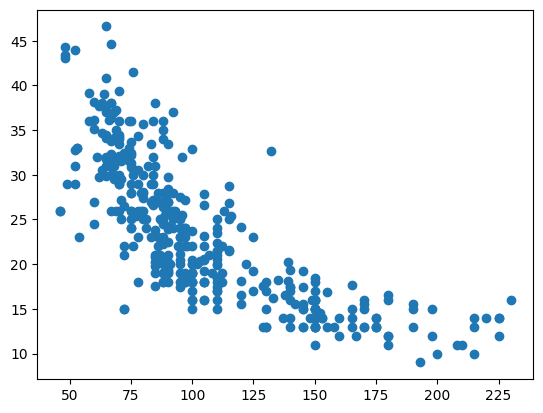

In [8]:
visualize(X,y,'horsepower')

visualiza(X, y, 'acceleration')

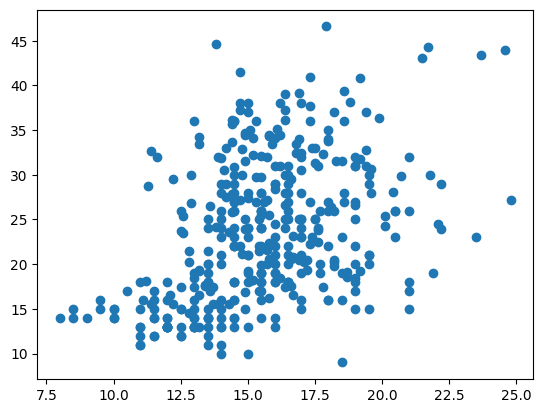

In [9]:
visualize(X,y,'acceleration')

Aunque lo ideal sería un modelo multivariante, vamos a elegir la variable `weight` y hacer una regresión lineal solo con esta variable.

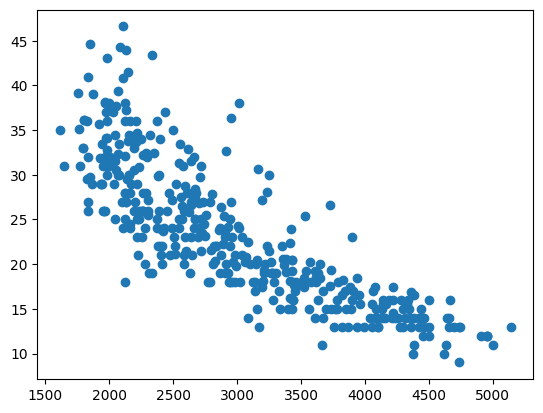

In [10]:
visualize(X,y,'weight')

### 1.2 Implementación del modelo

Lo primero, implementa una función que devuelva los valores de $\widehat{w}$ dados X e y. Si se da el caso de que el dataset tiene más features que observaciones, queremos transponerlo antes de realizar las operaciones. Lo hacemos porque, como vimos en clase, los resultados no van a ser buenos si el número de observaciones es menor.

In [11]:
import numpy as np

def pesos_ols(X, y):
    # TODO 1 Comprueba que las dimensiones son adecuadas y corrige si no es así
    if len(X.shape) == 1:
        # Si X es un vector, convertirlo en matriz columna
        X = X.reshape(-1, 1)
    if len(y.shape) == 1:
        # Si y es un vector, convertirlo en matriz columna
        y = y.reshape(-1, 1)
    
    # Asegúrate de que X tiene la forma correcta: (n_observaciones, n_features)
    if X.shape[0] != y.shape[0]:
        X = X.T  # Transponer para asegurar que filas sean observaciones
    
    # TODO 2 Prepara la matriz X para que tenga la forma adecuada para aplicar la fórmula 
    # Añadir una columna de unos para el término independiente (bias/intercept)
    X_b = np.hstack([np.ones((X.shape[0], 1)), X])
    
    # TODO 3 Calcula los pesos
    # Fórmula OLS: w = (X.T @ X)^(-1) @ X.T @ y
    w = np.linalg.inv(X_b.T @ X_b) @ (X_b.T @ y)
    
    return w

In [12]:
X = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077], 
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
y = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
pesos_ols(X, y)

array([[-2.29223802e+06],
       [ 5.92536529e+01],
       [ 1.20780450e+03]])

### 1.3 Prueba del modelo en los datos de consumo de coches

Ya podemos usar nuestra función `pesos` en el dataset real que hemos descargado. Para ver el ajuste, dibuja de nuevo los datos junto con la recta que has obtenido, en la misma gráfica. Tendrás que convertir los dataframes de Pandas en arrays de numpy para poder aplicar las operaciones matriciales.

TIP: Revisa las dimensiones de todos los arrays para ver que son correctas.

In [13]:
X = auto_mpg.data['features']
y = auto_mpg.data['targets']

In [14]:
df = pd.concat([X,y], axis=1).dropna()

target = 'mpg'
X = df[['weight']].values
y = df[target].values

NameError: name 'pd' is not defined

In [ ]:
# TODO Aplica el modelo y dibuja la recta junto con los datos

w = pesos_ols(X, y)
w.round(2)

array([[ 4.622e+01],
       [-1.000e-02]])

Por último, vamos a comprar el resultado con el que nos da `scikit-learn`para ver si nuestra implementación tiene buena pinta. Podemos ver cómo funciona en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [ ]:
from sklearn.linear_model import LinearRegression

# Creamos el objeto
lr = LinearRegression()

# Entrenamos con los datos
lr.fit(X, y)
print("Punto de corte:", lr.intercept_)
print("Pendiente:", lr.coef_)

Punto de corte: 46.21652454901758
Pendiente: [-0.00764734]


In [ ]:
y_pred = lr.predict(X)
y_pred

array([19.4202363 , 17.97488856, 19.9402556 , 19.96319762, 19.84084014,
       13.0194106 , 12.91999515, 13.24118353, 12.37703383, 16.77425579,
       18.96904309, 18.61726534, 17.45486927, 22.61682548, 28.07702805,
       24.55160315, 25.00279635, 26.43284941, 29.92768495, 32.183651  ,
       25.78282529, 27.63348219, 28.05408603, 29.13236132, 25.96636151,
       10.92403875, 12.75175361, 12.70586956, 10.02929967, 29.92768495,
       28.90294105, 29.17824538, 26.07342431, 19.91731357, 20.75852125,
       20.9649995 , 21.07206229, 14.02885982, 12.07878747, 14.44946366,
       14.89300952,  8.32394228,  9.92223687,  6.90918392, 23.56509596,
       27.80172372, 21.11794635, 22.21151633, 29.23942412, 29.98121635,
       30.35593613, 30.42476221, 32.65778623, 33.88136104, 32.19129834,
       31.26596989, 28.79587825, 29.95827432, 28.97941447, 27.80172372,
       29.19354006, 13.53178255, 12.68292753, 14.59476316, 14.64064722,
       18.13548276, 10.78638658, 11.78818845, 12.13996621, 12.39

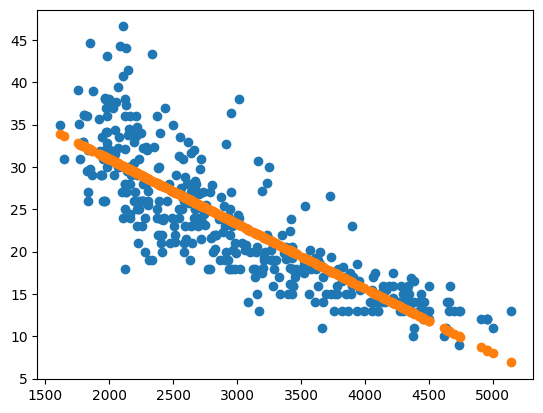

In [ ]:
plt.scatter(x=X, y=y)
plt.scatter(x=X, y=y_pred)  

**TODO**: Analiza el resultado obtenido y compáralo con el de sklearn

### 1.4 Compara el método de mínimos cuadrados y el descenso del gradiente para obtener los coeficientes de una regresión lineal

Los minimos cuadrados es un metodo deterministico que te devuelve los pesos optimizados en base a la menor area de los cuadrados utilizando la derivada para que la pendiente sea cero.

El descenso del gradiente es un metodo iterativo donde el modelo comienza con unos pesos aleatoerios y, paso a paso, evalua hacia donde tiene que mover el peso hasta converger.

## 2. Optimización con descenso del gradiente [OPCIONAL]

Este ejercicio es opcional, no es necesario hacerlo para conseguir el APTO en la práctica, pero podéis hacerlo si queréis practicar más sobre el método del descenso del gradiente, que es muy importante en machine learning.

Vamos a resolver el mismo problema usando el descenso del gradiente en lugar de la solución analítica. El descenso del gradiente es un método de optimización iterativo que usa el operador gradiente.

Como es iterativo, necesitamos decirle cuándo tiene que parar y darnos la solución. En este caso, le vamos a decir que pare y nos devuelva la solución después de un número de iteraciones que le pasaremos como parámetro. La ecuación iterativa es.

$$w^{t+1} = w^t - \eta \cdot \nabla f(w)$$

donde f es nuestra función objetivo, y w es un vector. Para la función objetivo, vamos a usar el error RSS, que querremos minimizar.

$$ RSS(w) = \frac{1}{2}\sum_{n=1}^{N}[y_n-f(x_n)]^2$$

y cuyo gradiente es:

$$\nabla RSS(w) = X^T(Xw^t-y)$$

TIP: Ten en cuenta que el RSS también lo puedes escribir como $\frac{1}{2}\sum_{n=1}^{N}[y_n-\hat{y_n}]^2$ donde $\hat{y_n} = X \hat{w}$ en cada paso.

### 2.1 Implementar el descenso del gradiente

Completa las siguientes funciones para implementar el descenso del gradiente con la función objetivo de la regresión lineal. La función necesitará:

- La entrada X y salida y de la regresión
- Un punto inicial desde el que empezar a iterar
- El número de iteraciones 
- El learning rate

La función nos devolverá un array con las w resultantes de las iteraciones y otro con el valor de la función en cada paso del algoritmo, a la que también se conoce como *loss function*.

In [ ]:
import numpy as np

def gradient_descent(X, y, w0, n_iter, eta): 
    # Inicializamos variables
    loss_iter = [np.inf]
    w_iter = [w0]
    w = w0
    
    # TODO 1 Añade la columna de 1s
    X_b = np.hstack([np.ones((X.shape[0], 1)), X])
    
    # TODO 2 Haz un bucle para las iteraciones 
    for i in range(n_iter):
        # TODO 3 Dentro del bucle tendrás que actualizar el error y los pesos y añadirlos a las listas
        gradients = 2 / X_b.shape[0] * X_b.T @ (X_b @ w - y)
        w = w - eta * gradients
        
        # Calculamos la pérdida (error cuadrático medio)
        loss = np.mean((X_b @ w - y) ** 2)
        
        # Guardamos los pesos y la pérdida
        w_iter.append(w)
        loss_iter.append(loss)
    
    # Devuelve los resultados
    return np.array(w_iter), np.array(loss_iter)

# Parámetros del descenso de gradiente
eta = 0.01 
iteraciones = 2000 

# Inicialización de pesos aleatorios
np.random.seed(123)
w0 = np.random.rand(2, 1)

# Datos de entrenamiento
y = np.array([208500, 181500, 223500, 140000, 250000]).reshape((5,1))
X = np.array( [[  0.37020659],
               [  -0.48234664],
               [  0.51483616],
               [  0.38352774],
               [  1.29888065]])

# Ejecución del descenso de gradiente
weights, loss = gradient_descent(X, y, w0, iteraciones, eta)

# Imprimir los pesos finales
print(weights[-1])

[[183844.99464097]
 [ 40417.13664575]]


In [ ]:
weights[-1]

array([[183844.99464097],
       [ 40417.13664575]])

### 2.2 Aplicar al dataset de consumo de combustible

Leemos de nuevo los datos y aplicamos la función que acabamos de programar.

In [ ]:
X = df[['weight']].values
y = df[['mpg']].values

In [ ]:
weights, loss = gradient_descent(X, y, w0, iteraciones, eta)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15072\2334237064.py:19: RuntimeWarning: overflow encountered in square
  loss = np.mean((X_b @ w - y) ** 2)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_15072\2334237064.py:19: RuntimeWarning: overflow encountered in matmul
  loss = np.mean((X_b @ w - y) ** 2)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_15072\2334237064.py:15: RuntimeWarning: overflow encountered in matmul
  gradients = 2 / X_b.shape[0] * X_b.T @ (X_b @ w - y)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_15072\2334237064.py:16: RuntimeWarning: invalid value encountered in subtract
  w = w - eta * gradients


In [ ]:
weights

array([[[ 6.96469186e-01],
        [ 2.86139335e-01]],

       [[-1.58886210e+01],
        [-5.36116536e+04]],

       [[ 3.19264913e+06],
        [ 1.02780014e+10]],

       ...,

       [[            nan],
        [            nan]],

       [[            nan],
        [            nan]],

       [[            nan],
        [            nan]]])

Para ayudar al algoritmo, vamos a escalar la variable X, restando la media y dividiendo entre la desviación estándar. Después aplicamos la función anterior y dibujamos.

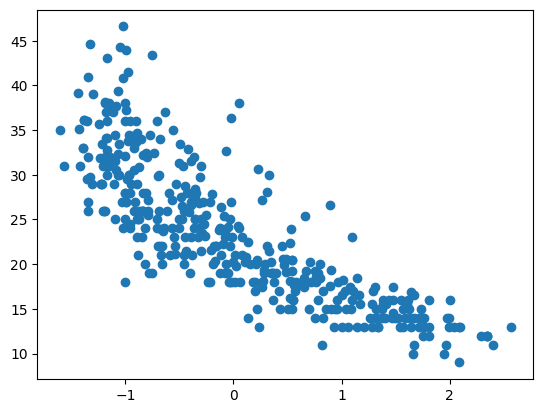

In [15]:
# TODO Aplica el modelo y dibuja la recta junto con los datos

X = auto_mpg.data.features
y = auto_mpg.data.targets

# Escalamos la variable x 

X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

X_gd=(X_np - X_np.mean()) / X_np.std()
y_gd = y_np

# TODO 1 Punto inicial y learning rate


# TODO 2 Aplicamos el algoritmo


# Límites de los ejes
x_max = np.max(X_gd) + 1
x_min = np.min(X_gd) -1


# TODO 3 Dibuja la gráfica
plt.scatter(x=X_gd, y=y_gd)